<a href="https://colab.research.google.com/github/silvaelaine/eda-fastfood-analysis/blob/main/eda_fastfood_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastfood-nutrition/fastfood.csv


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading dataset

In [ ]:
df = pd.read_csv(r'/kaggle/input/fastfood-nutrition/fastfood.csv')

In [ ]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [ ]:
df.tail()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other
514,Taco Bell,Fiesta Taco Salad-Steak,720,320,36,8.0,1.0,55,1340,70,8.0,8,28.0,NaN,NaN,NaN,Other


In [ ]:
df.shape

(515, 17)

The dataset has 515 rows and 17 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [ ]:
print(f"List of columns(Features): {df.columns}.")

List of columns(Features): Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium', 'salad'],
      dtype='object').


In [ ]:
# Unique values per column
df.nunique().sort_values()

salad            1
restaurant       8
trans_fat       10
fiber           18
vit_a           21
vit_c           23
calcium         26
sugar           31
sat_fat         40
cholesterol     52
protein         70
total_fat       80
total_carb     103
calories       113
cal_fat        117
sodium         197
item           505
dtype: int64

In [ ]:
# List of restaurants
df.restaurant.unique()

array(['Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys', 'Burger King',
       'Dairy Queen', 'Subway', 'Taco Bell'], dtype=object)

In [ ]:
#Missing values per columns
df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [ ]:
print(f"Missing data: {df.isnull().values.sum()}.")

Missing data: 647.


In [ ]:
# Categorical cols
df.select_dtypes(include=['object']).columns

Index(['restaurant', 'item', 'salad'], dtype='object')

In [ ]:
# Numerical cols
df.select_dtypes(exclude=['object']).columns

Index(['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat',
       'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein',
       'vit_a', 'vit_c', 'calcium'],
      dtype='object')

In [ ]:
#Data types
df.dtypes

restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object

In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.621.222118 requires jupyter-server~=1.16, but you have jupyter-server 2.6.0 which is incompatible.
featuretools 1.26.0 requires pandas<2.0.0,>=1.5.0, but you have pandas 2.0.3 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
woodwork 0.24.0 requires pandas<2.0.0,>=1.4.3, but you have pandas 2.0.3 which is incompatibl

# Exploratory analysis

## Handling missing values

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("There's " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

data_missing = missing_values_table(df)
data_missing

There's 5 columns with missing values.


,Missing Values,% of Total Values
vit_a,214,41.6
vit_c,210,40.8
calcium,210,40.8
fiber,12,2.3
protein,1,0.2


## Replacing missing values with 0

In [ ]:
df.fillna(value=0, inplace=True)

In [ ]:
df.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

## Statistical Analysis

In [ ]:
df[['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat',
       'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein',
       'vit_a', 'vit_c', 'calcium']].describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.040777,7.262136,27.836893,11.021359,11.945631,14.718447
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.066114,6.761301,17.709409,25.718045,25.533547,23.123513
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,15.500000,0.000000,0.000000,0.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.000000,2.000000,2.000000,6.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,15.000000,15.000000,25.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


* 50% of our dataset has foods with 490 calories or less.

* 75% of our dataset has foods with 20 vitamin A or less.

* Columns with outliers: Calories, Cholesterol, Sodium, Vitamin A, calcium, protein, Vitamin C, total_fat, total_carb.

Pandas' describe method is pretty naive.

Here's a richer alternative:

* Skimpy is a Jupyter-based tool that provides a standardized and comprehensive data summary.

In [ ]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 515    │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75     ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ calories            │     0 │        0 │     530 │     280 │   20 │    330 │     690 │    2400 │    ▇█▂    │  │
│ │ cal_fat             │     0 │        0 │     240 │     170 │    0 │    120 │     310 │    1300 │    █▆▁    │  │
│ │ total_fat           │     0 │        0 │      27 │      18 │    0 │     14 │      35 │     140 │    █▆▁    │  │
│ │ sat_fat             │     0 │        0 │     8.2 │     6.4 │    0 │      4 │      11 │      47 │    █▅▁    │  │
│ │ trans_fat           │     0 │        0 │    0.47 │    0.84 │    0 │      0 │       1 │       8 │    █▁     │  │
│ │ cholesterol         │     0 │        0 │      72 │      63 │    0 │     35 │      95 │     800 │    █▁     │  │
│ │ sodium              │     0 │        0 │    1200 │     690 │   15 │    800 │    1600 │    6100 │    ▇█▁    │  │
│ │ total_carb          │     0 │        0 │      46 │      25 │    0 │     28 │      57 │     160 │   ▃█▄▂    │  │
│ │ fiber               │     0 │        0 │       4 │     3.1 │    0 │      2 │       5 │      17 │   ▇█▂▂    │  │
│ │ sugar               │     0 │        0 │     7.3 │     6.8 │    0 │      3 │       9 │      87 │    █▁     │  │
│ │ protein             │     0 │        0 │      28 │      18 │    0 │     16 │      36 │     190 │    █▄     │  │
│ │ vit_a               │     0 │        0 │      11 │      26 │    0 │      0 │      15 │     180 │    █▁     │  │
│ │ vit_c               │     0 │        0 │      12 │      26 │    0 │      0 │      15 │     400 │     █     │  │
│ │ calcium             │     0 │        0 │      15 │      23 │    0 │      0 │      25 │     290 │    █▁     │  │
│ └─────────────────────┴───────┴──────────┴─────────┴─────────┴──────┴────────┴─────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ restaurant                │       0 │          0 │                          1.5 │                      769 │  │
│ │ item                      │       0 │          0 │                          1.5 │                      769 │  │
│ │ salad                     │       0 │          0 │  

## Detecting Outliers using Boxplot

Boxplot is the best way to see outliers.

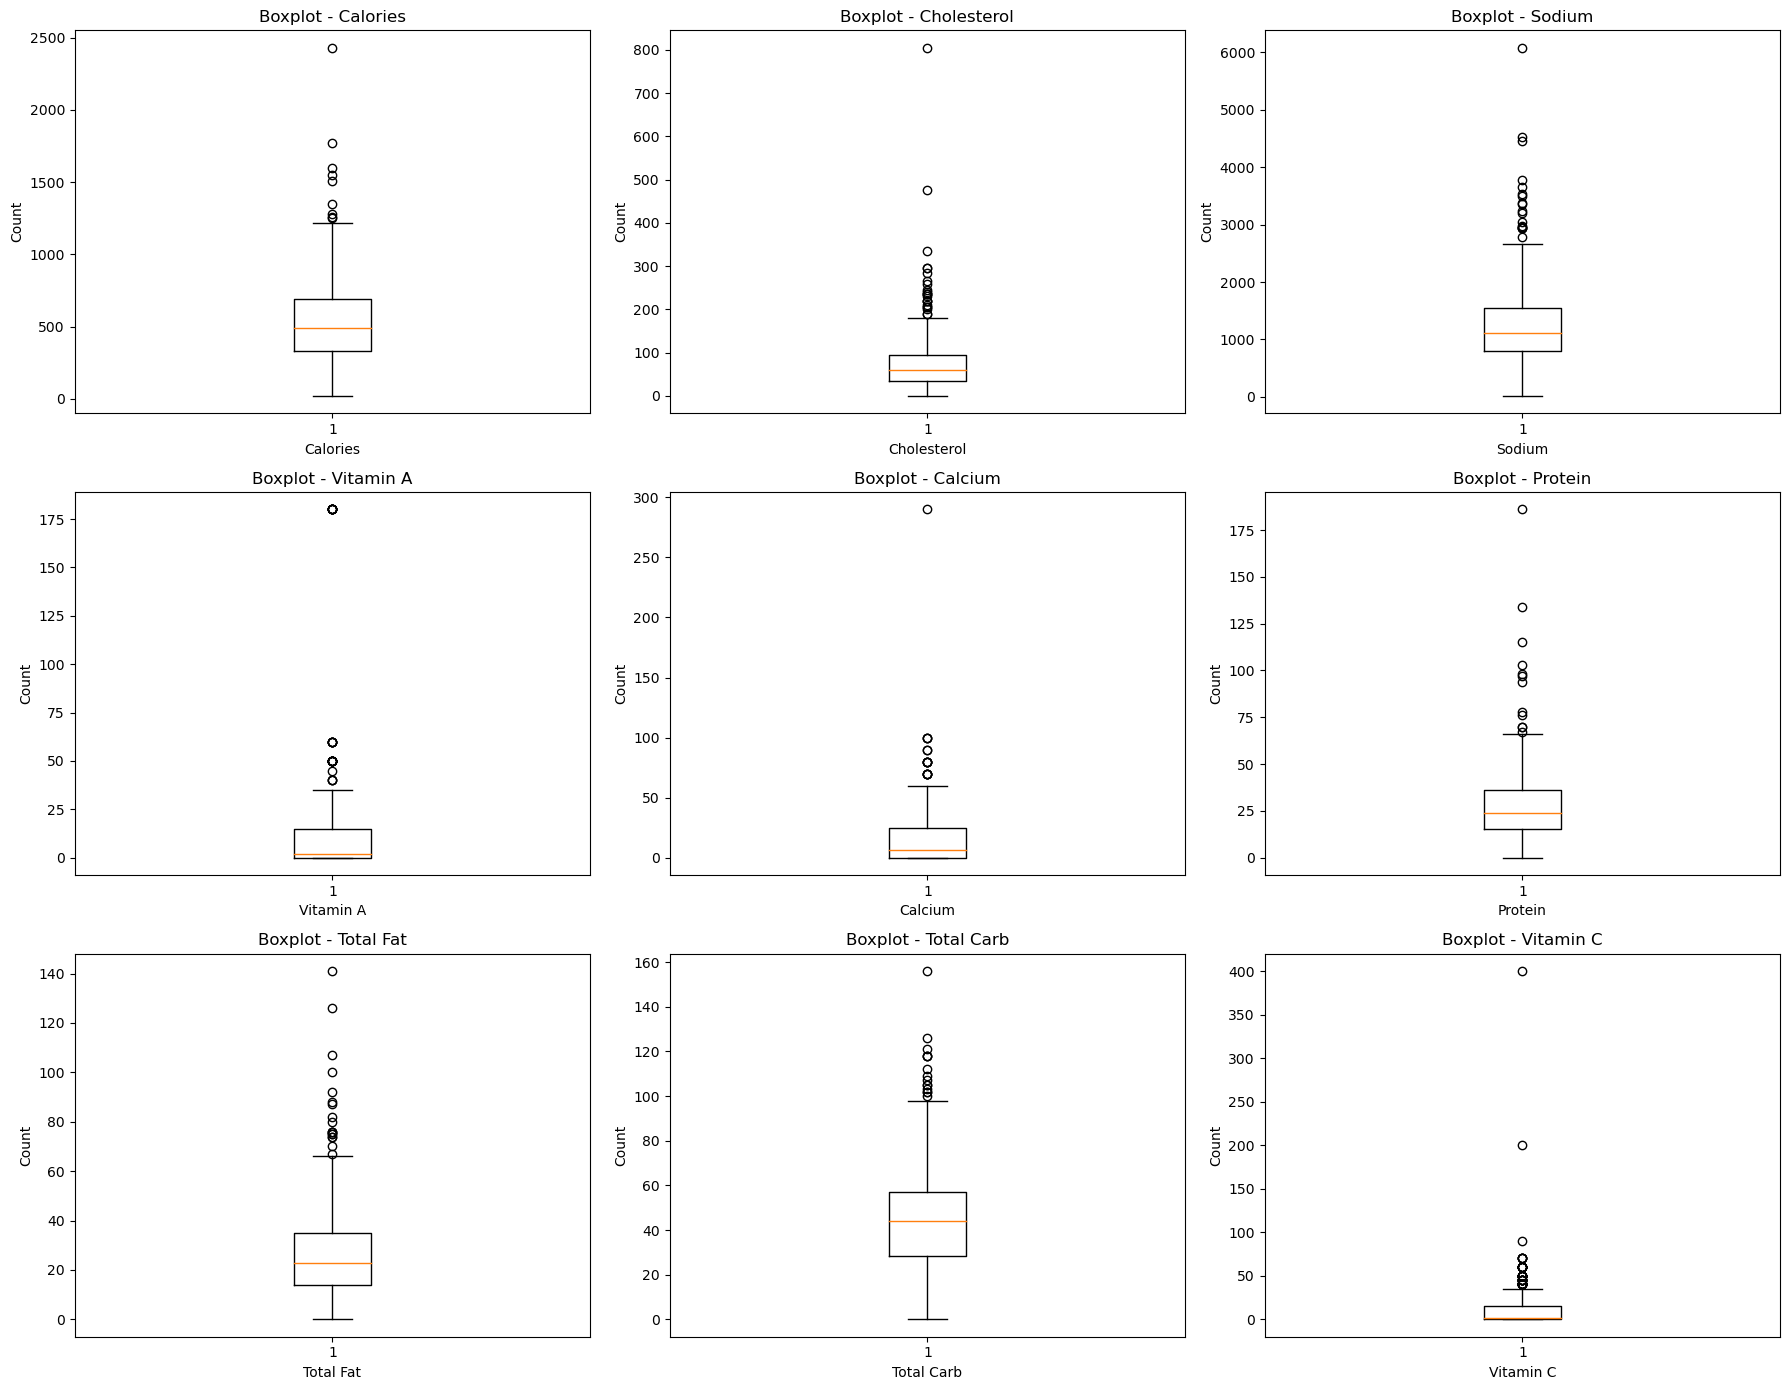

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

axes[0, 0].boxplot(df.calories)
axes[0, 0].set_xlabel('Calories')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title(r'Boxplot - Calories')

axes[0, 1].boxplot(df.cholesterol)
axes[0, 1].set_xlabel('Cholesterol')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title(r'Boxplot - Cholesterol')

axes[0, 2].boxplot(df.sodium)
axes[0, 2].set_xlabel('Sodium')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title(r'Boxplot - Sodium')

axes[1, 0].boxplot(df.vit_a)
axes[1, 0].set_xlabel('Vitamin A')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title(r'Boxplot - Vitamin A')

axes[1, 1].boxplot(df.calcium)
axes[1, 1].set_xlabel('Calcium')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title(r'Boxplot - Calcium')

axes[1, 2].boxplot(df.protein)
axes[1, 2].set_xlabel('Protein')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title(r'Boxplot - Protein')

axes[2, 0].boxplot(df.total_fat)
axes[2, 0].set_xlabel('Total Fat')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title(r'Boxplot - Total Fat')

axes[2, 1].boxplot(df.total_carb)
axes[2, 1].set_xlabel('Total Carb')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title(r'Boxplot - Total Carb')

axes[2, 2].boxplot(df.vit_c)
axes[2, 2].set_xlabel('Vitamin C')
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_title(r'Boxplot - Vitamin C')



fig.tight_layout()
plt.show()

## Answering questions
* What food has highest calories?
* What fast-food restaurant sells the highest calories food?
* What is the median(the mean is very sensitive to the presence of outliers, so we won't use it.) of calories, calories from fat, cholesterol, and sodium in their food?
* What food has lowest calories and what restaurant sells it?

**Let's see what food has highest calories:**

In [ ]:
print(f"Our dataset contains calories from {df.calories.min()} up to {df.calories.max()}.")

Our dataset contains calories from 20 up to 2430.


In [ ]:
df.query(f"calories == {df.calories.max()}")

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,24.0,2.0,475,6080,103,2.0,3,186.0,0.0,2.0,8.0,Other


The food with highest calories is the item: 20 piece Buttermilk Crispy Chicken Tenders.

![](http://www.nrn.com/sites/nrn.com/files/mcdonalds-buttermilk-crispy-chicken-tenders_0.gif)

**What fast-food restaurant sells the highest calories food?**

McDonalds sells the highest calories foods.
Top 3 highest:

In [ ]:
df.query(f"calories in {df.calories.nlargest(3).to_list()}")

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,24.0,2.0,475,6080,103,2.0,3,186.0,0.0,2.0,8.0,Other
44,Mcdonalds,40 piece Chicken McNuggets,1770,960,107,18.0,0.5,295,3370,105,7.0,1,98.0,0.0,15.0,6.0,Other
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,600,66,10.0,0.0,265,4450,156,5.0,87,97.0,8.0,40.0,10.0,Other


**What is the median(the mean is very sensitive to the presence of outliers, so we won't use it.) of calories, calories from fat, cholesterol, and sodium in their food?**

In [ ]:
agg_func = {
    'calories': ['median'],
    'cal_fat': ['median'],
    'cholesterol': ['median'],
    'sodium': ['median']
}

mc_describe = df[df['restaurant'] == 'Mcdonalds'].agg(agg_func).plot.barh()

Custom TB Handler failed, unregistering


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_20/998646564.py", line 8, in <module>
    mc_describe = df[df['restaurant'] == 'Mcdonalds'].agg(agg_func).plot.barh()
  File "/opt/conda/lib/python3.10/site-packages/pandas/plotting/_core.py", line 1245, in barh
    Column in the DataFrame to group by.
  File "/opt/conda/lib/python3.10/site-packages/pandas/plotting/_core.py", line 920, in __call__
    return plot_backend.plot(data, x=x, y=y, kind=kind, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/plotting/_core.py", line 1886, in _get_plot_backend
  File "/opt/conda/lib/python3.10/site-packages/pandas/plotting/_core.py", line 1817, in _load_backend
    # Fall back to unregistered, module name approach.
ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.



**What food has lowest calories and what restaurant sells it?**

Let's see what food has lowest calories:

In [ ]:
df.query(f"calories == {df.calories.min()}")

The food with lowest calories is the item: Side Salad. Dairy Queen sells it:

![](http://images.getbento.com/accounts/0a6ca328d2a4178127fd36f1a142b8e4/media/images/60093dq-sides-salad_1.png?w=1200&fit=max&auto=compress,format)

Let's see top 5 lowest calories foods and what restaurant sells it:

In [ ]:
df.query(f"calories in {df.calories.nsmallest(5).to_list()}").\
sort_values(by='calories', ascending=False)

## Data Visualization

Answering another questions using Data Visualization:
* What is the distribution of restaurants?
* What is the median of calories per restaurants?
* Worst Foods to Eat for Your Health

In [ ]:
plt.style.use("ggplot")
fig = px.histogram(df, x="restaurant")
fig.show()

In [ ]:
df['restaurant'].value_counts()

**What is the median of calories per restaurant?**

In [ ]:
#Median of calories VS Restaurants
median_restaurant = df.groupby('restaurant')['calories'].median()
#Setting colors
colors = ['cornflowerblue', 'mediumseagreen', 'tomato', 'mediumslateblue', 'lightseagreen', 'gold', 'aquamarine', 'magenta']

fig, ax = plt.subplots(figsize=(14, 10))

ax.bar(median_restaurant.index, median_restaurant.values, color = colors)


ax.set_xlabel('Restaurants')
ax.set_ylabel('Calories')
ax.set_title('Median of calories VS Restaurants')


ax.text(0, median_restaurant.values[0],
        f'{median_restaurant.values[0]:.2f}', ha = 'center', va = 'bottom', fontsize = 12)

ax.text(1, median_restaurant.values[1],
        f'{median_restaurant.values[1]:.2f}', ha = 'center', va = 'bottom', fontsize = 12)

ax.text(2, median_restaurant.values[2],
        f'{median_restaurant.values[2]:.2f}', ha = 'center', va = 'bottom', fontsize = 12)

ax.text(3, median_restaurant.values[3],
        f'{median_restaurant.values[3]:.2f}', ha = 'center', va = 'bottom', fontsize = 12)

ax.text(4, median_restaurant.values[4],
        f'{median_restaurant.values[4]:.2f}', ha = 'center', va = 'bottom', fontsize = 12)

ax.text(5, median_restaurant.values[5],
        f'{median_restaurant.values[5]:.2f}', ha = 'center', va = 'bottom', fontsize = 12)

ax.text(6, median_restaurant.values[6],
        f'{median_restaurant.values[6]:.2f}', ha = 'center', va = 'bottom', fontsize = 12)

ax.text(7, median_restaurant.values[7],
        f'{median_restaurant.values[7]:.2f}', ha = 'center', va = 'bottom', fontsize = 12)



plt.show()

## Cumulative Distribution Function (CDF) plots

In [ ]:
#Cholesterol -

x = np.sort(df['cholesterol'])
y = np.arange(len(df)) / float(len(df))

plt.xlabel('Cholesterol')
plt.ylabel('%')
plt.title('Cholesterol - Cumulative distribution')

plt.plot(x, y, marker = 'o')

With this graph we can see that 80% of foods has 100mg of Cholesterol.

In [ ]:
#Sodium
x = np.sort(df['sodium'])
y = np.arange(len(df)) / float(len(df))

plt.xlabel('Sodium')
plt.ylabel('%')
plt.title('Sodium - Cumulative distribution')

plt.plot(x, y, marker = 'o')

With this graph we can see that 80% of foods have between 1000mg and 2000mg of Sodium.

## Worst Foods to Eat for Your Health
### Health authorities recommend between 1,500 mg (1.5 grams) and 2,300 mg (2.3 grams) of sodium per day for heart health. Let's see what food exceeds daily limit:

In [ ]:
df.query('sodium >= 2300')

**Food with highest sodium:**

In [ ]:
df.query(f"sodium == {df.sodium.max()}")

### If you have risk factors for heart disease, you should not consume more than 200 milligrams of cholesterol a day. If you do not have risk factors for heart disease, you should limit your cholesterol intake to no more than 300 milligrams a day.
Let's see what food exceeds daily limit:

In [ ]:
df.query('cholesterol >= 300')

### What about 'total fat'? So, if you're following a 2,000-calorie-a-day diet, your target range for total fat is 44 to 78 grams a day.

In [ ]:
df.query('total_fat >= 78')

## Conclusions

Finding a healthy, well-balanced meal in a fast food restaurant can be a challenge. Fast food is associated with higher body mass index, less successful weight-loss maintenance and weight gain. Most foods exceed daily limit cholesterol, sodium, total fat and sugar. Eating too many foods that are high in cholesterol, saturated fats, and trans fats may increase your risk of developing high cholesterol. Without treatment, high cholesterol may lead to many health issues, including heart attack and stroke.